<a href="https://colab.research.google.com/github/suhanasulfi/cat-vs-dog-classifier/blob/main/Cats_vs_Dogs_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE 1: Understanding Image Data**

### *Step 1: Choose dataset*

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"suhanaps","key":"624108515764a072b7b257afcb89f3ac"}'}

In [ ]:
#set json file permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_set.zip to test_set.zip


In [ ]:
# Unzip into /content/
!unzip test_set.zip


Archive:  test_set.zip
   creating: test_set/
   creating: test_set/cats/
  inflating: test_set/cats/_DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg  
  inflating: test_set/cats/cat.4021.jpg  
  inf

### *Step 2: Explore the Images*

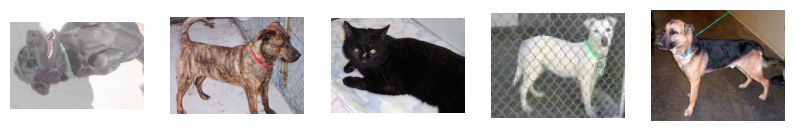

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

base_folder = "data/test_set"
categories = ["cats", "dogs"]

# Get full paths to all images
all_images = []
for category in categories:
    category_path = os.path.join(base_folder, category)
    for file in os.listdir(category_path):
        all_images.append(os.path.join(category_path, file))

# Display 5 random images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = random.choice(all_images)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


# **PHASE 2: Preprocessing Images**

### *resize, normalise, and optionally augment the images*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Create the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
)

# Step 2: Load training data
train_data = datagen.flow_from_directory(
    "/content/test_set",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Step 3: Load validation data
val_data = datagen.flow_from_directory(
    "/content/test_set",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1619 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


# **PHASE 3: Build model using Transfer Learning**(MobileNetV2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(128, 128, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# **PHASE 4: Train your model**

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 37s 558ms/step - accuracy: 0.8755 - loss: 0.2372 - val_accuracy: 0.9381 - val_loss: 0.1596
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 516ms/step - accuracy: 0.9916 - loss: 0.0311 - val_accuracy: 0.9356 - val_loss: 0.1850
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 505ms/step - accuracy: 0.9875 - loss: 0.0302 - val_accuracy: 0.9431 - val_loss: 0.1872
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 510ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9505 - val_loss: 0.1778
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 485ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9629 - val_loss: 0.1693


# **PHASE 5: Visualise Accuracy and Loss**

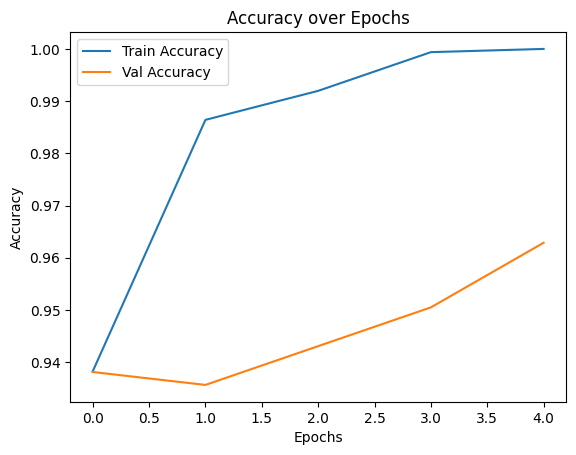

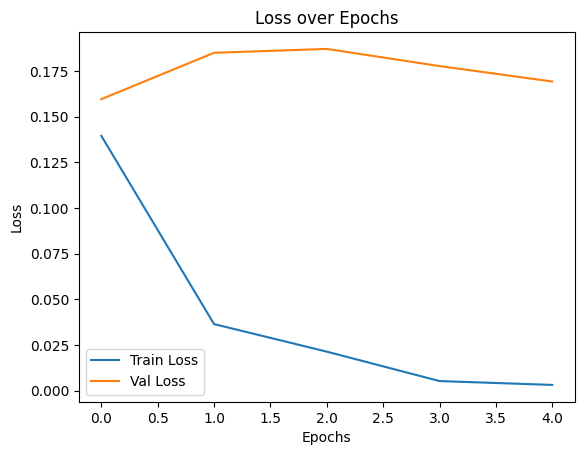

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# **PHASE 6: Test the Model by Uploading Images**

Saving dog out3.jpg to dog out3.jpg


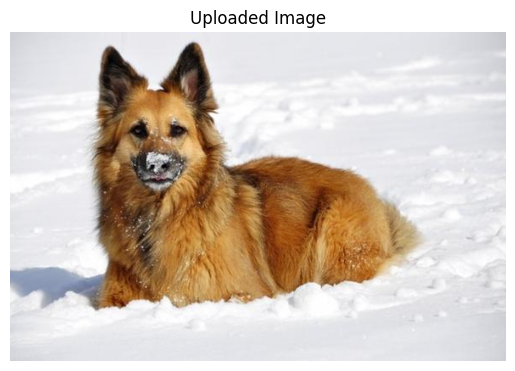

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: It's a Dog 🐶 (Confidence: 99.90%)


In [ ]:
# Step 1: Upload an image
from google.colab import files
uploaded = files.upload()

# Step 2: Load and preprocess the image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load the image and preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Make it batch-shaped

# Step 3: Display the image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Step 4: Predict
prediction = model.predict(img_array)

# Step 5: Output Result
if prediction[0][0] > 0.5:
    confidence = prediction[0][0] * 100
    print(f"Prediction: It's a Dog 🐶 (Confidence: {confidence:.2f}%)")
else:
    confidence = (1 - prediction[0][0]) * 100
    print(f"Prediction: It's a Cat 🐱 (Confidence: {confidence:.2f}%)")

# **PHASE 7: Devolop a Web App**

In [ ]:
#step 1:install Gradio
!pip install gradio


In [ ]:
#step 2: Define your Prediction Function
import gradio as gr
from PIL import Image
import numpy as np

def predict_image(img):
    # Step 1: Convert to RGB in case the image is grayscale or has alpha
    img = img.convert("RGB")

    # Step 2: Preprocess
    img = img.resize((128, 128))                      # Resize to model's expected input
    img_array = np.array(img) / 255.0                 # Normalize
    img_array = np.expand_dims(img_array, axis=0)     # Add batch dimension

    # Step 3: Predict
    prediction = model.predict(img_array)

    # Step 4: Return result
    if prediction[0][0] > 0.5:
        return "Prediction: It's a Dog 🐶"
    else:
        return "Prediction: It's a Cat 🐱"

In [ ]:
#step 3: Create and Launch the Interface
interface = gr.Interface(
    fn=predict_image,                 # The function to call
    inputs=gr.Image(type="pil"),      # Accept image input
    outputs="text",                   # Show text output
    title="AI-Powered Cat vs Dog Classifier",    # Web app title
    description="Upload an image to find out if it's a Cat or Dog!"
)

interface.launch(share=True)  # 'share=True' gives you a public link

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb9f234e340b8fe49d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.save("model.h5")

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>